# Importing basic Libraries

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns

## Extracting Zip file

In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/project/data.zip','r')as zip_ref:
  zip_ref.extractall('extract_file')

In [3]:
import os
data_list = os.listdir('/content/extract_file/data')
data_list

['horses', 'human', 'flowers', 'cats', 'bike', 'cars', 'dogs']

In [4]:
import os
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import cv2

data_path = '/content/extract_file/data'
img_data_list = []
labels = []

for dataset in data_list:
    img_list = os.listdir(data_path + '/' + dataset)
    print('Loaded the images of dataset-' + '{}\n'.format(dataset))
    for img in img_list:
        input_img = cv2.imread(data_path + '/' + dataset + '/' + img)
        input_img_resize = cv2.resize(input_img, (224, 224))
        img_data_list.append(input_img_resize)
        labels.append(dataset)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)

num_classes = 7
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']  # Assuming these are your class names
label_map = {name: i for i, name in enumerate(names)}
numerical_labels = [label_map[label] for label in labels]


Loaded the images of dataset-horses

Loaded the images of dataset-human

Loaded the images of dataset-flowers

Loaded the images of dataset-cats

Loaded the images of dataset-bike

Loaded the images of dataset-cars

Loaded the images of dataset-dogs

(1803, 224, 224, 3)


## Spliting and Encoding data

In [5]:

import tensorflow as tf
Y = tf.keras.utils.to_categorical(numerical_labels, num_classes)

x,y = shuffle(img_data,Y, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2)

In [6]:
print("X_train shape= {}".format(X_train.shape))
print("X_val shape = {}".format(X_val.shape))

X_train shape= (1442, 224, 224, 3)
X_val shape = (361, 224, 224, 3)


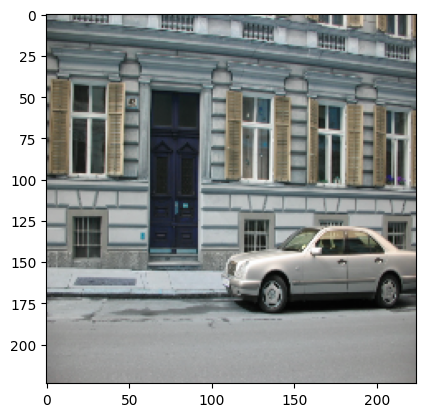

In [7]:
image = X_train[1203,:]
plt.imshow(image)
plt.show()

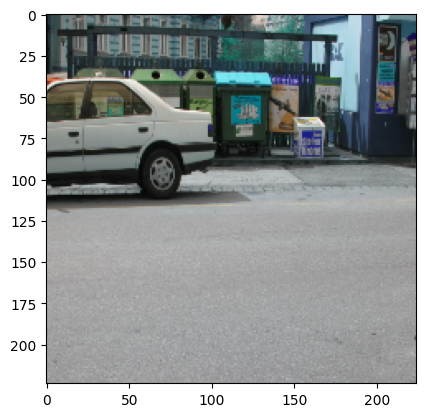

In [8]:
image = X_val[12,:]
plt.imshow(image)
plt.show()

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation="softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,295 (91.20 MB)

 Trainable params: 23,908,295 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model

In [10]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer='Adam', loss = "CategoricalCrossentropy",metrics = ['accuracy'])

## Train the model

In [11]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=32, epochs=5,validation_data=(X_val, y_val), callbacks=[checkpointer],verbose=2, shuffle=True)


Epoch 1/5

Epoch 1: val_loss improved from inf to 1.31401, saving model to model.weights.best.keras
46/46 - 162s - 4s/step - accuracy: 0.2947 - loss: 2.7254 - val_accuracy: 0.5180 - val_loss: 1.3140
Epoch 2/5

Epoch 2: val_loss improved from 1.31401 to 1.16577, saving model to model.weights.best.keras
46/46 - 162s - 4s/step - accuracy: 0.5659 - loss: 1.2493 - val_accuracy: 0.6565 - val_loss: 1.1658
Epoch 3/5

Epoch 3: val_loss improved from 1.16577 to 0.96758, saving model to model.weights.best.keras
46/46 - 195s - 4s/step - accuracy: 0.6879 - loss: 0.8876 - val_accuracy: 0.6676 - val_loss: 0.9676
Epoch 4/5

Epoch 4: val_loss did not improve from 0.96758
46/46 - 204s - 4s/step - accuracy: 0.7635 - loss: 0.6724 - val_accuracy: 0.6731 - val_loss: 1.0645
Epoch 5/5

Epoch 5: val_loss improved from 0.96758 to 0.82870, saving model to model.weights.best.keras
46/46 - 198s - 4s/step - accuracy: 0.8315 - loss: 0.5166 - val_accuracy: 0.7175 - val_loss: 0.8287


## Visualizing Training Loss and Validation Loss

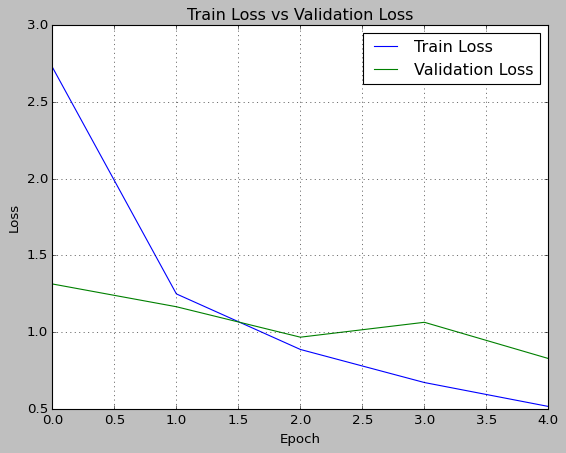

In [18]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Train Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use(['classic'])


## Visualizing Training Accuracy and Validation Accuracy

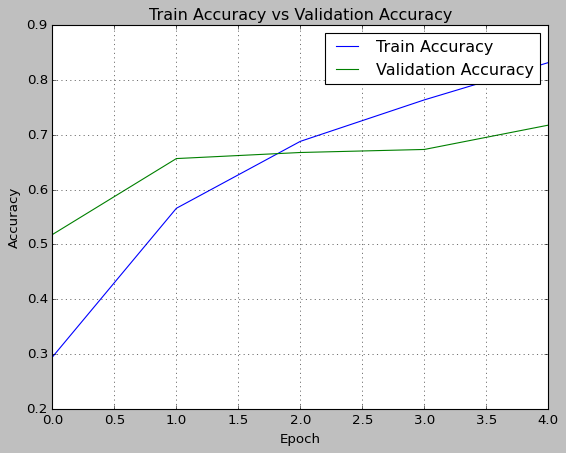

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Train Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.style.use(['classic'])
plt.show()